In [2]:
#Distribution Plots

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline
#to see the visualisation inside the fucntion

In [8]:
# seaborn comes with the inbuilt datasets, which you can directly loads
#tips is one of those

In [9]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
#first plot
#dist plot allows you to visualise distrubution in the form of histogram
#just pass in single columns
#line on the histogram is kde(kernel density estimation)
#bins value: if you want to plot more price point

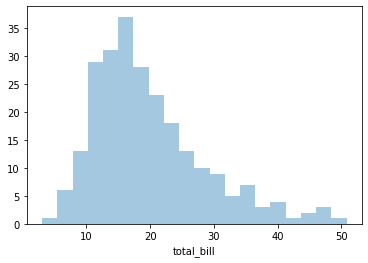

In [76]:
sns.distplot(tips['total_bill'],kde=False,bins=20)
#histogram displaying most of the bills between 10 and 20 dollars


In [45]:
#jointplot allows us to match up the two dist plot 
#pass in x,y variable(column name in string) and data sets
#kind parameter allows you to change the distribution representation inside the joint plot(bydefault it is scatter plot)
#reg,hex,kde(shows us the density where the point match up the most)

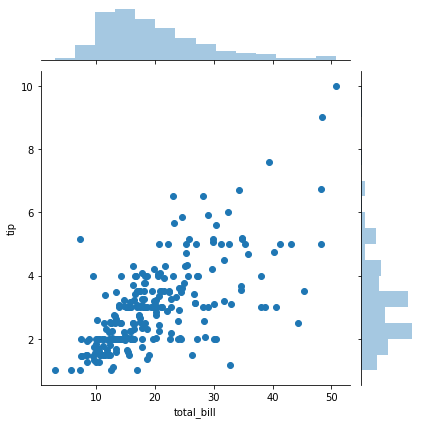

In [50]:
sns.jointplot(x='total_bill',y='tip',data=tips)
#scatter plot showing as you go high on bill, you go high on tip

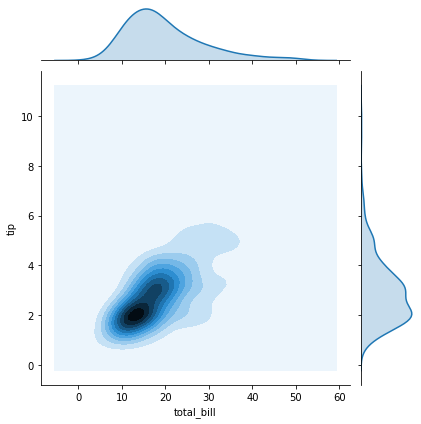

In [51]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

In [56]:
#pair plot is going to plot pair wise relationships across the entire dataframe for numeric column

#Note: In jointplot you put x verus y columns by yourself to plot 

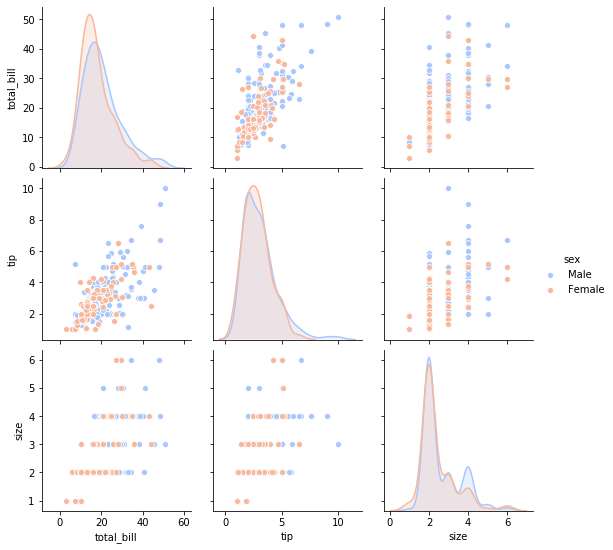

In [64]:
#it allows you to quicly visualise your data
#hue argument: you will pass categorical column in this. For ex: sex column is categorised into male and female
#hue will color the data points based on the column
#palette allows you to choose specific color using colormap string from matplotlib
sns.pairplot(tips,hue='sex',palette='coolwarm')

In [65]:
#rug plot: It just draws a dash point on the distribution variable
#pass single column

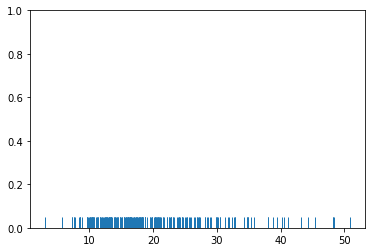

In [66]:
sns.rugplot(tips['total_bill'])

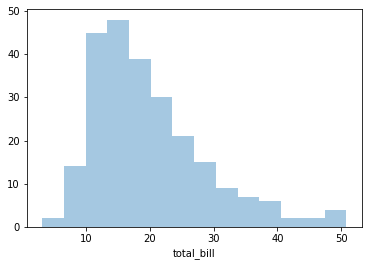

In [80]:
#difference between histogram and rugplot
#bins are the bars of plot****
#distplot histogram showing no.of dashed in bin present For ex:between value 10 and 11 of total_bill 
#and then showing as a number up on y axis whereas in rug plot its actually showing the dashes between the values
sns.distplot(tips['total_bill'],kde=False)

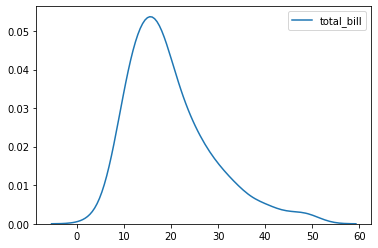

In [83]:
sns.kdeplot(tips['total_bill'])

In [77]:
#kdeplot
#kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a 
#Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

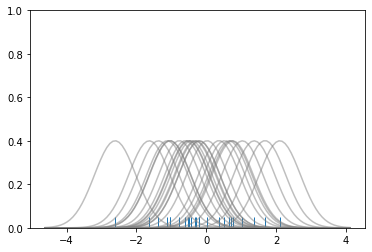

In [78]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

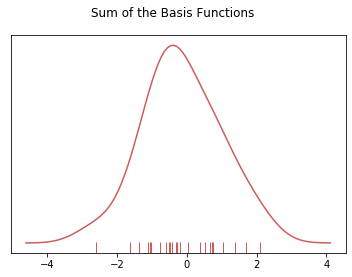

In [79]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [1]:
#categorical plots

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
#bar plot: allows you to aggregate the categorical data based on some function. bydefault mean

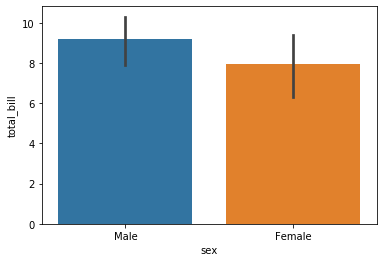

In [23]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data = tips,estimator=np.std)#you can perform aggregate functions by estimator argument
#its showing average of total bill for categorical column(sex)

In [24]:
#count plot: counting number of occurence,hence we are setting x value only

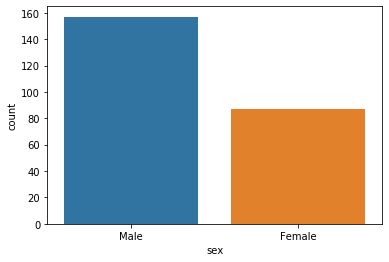

In [25]:
sns.countplot(x='sex',data=tips)

In [26]:
#distribution of category data

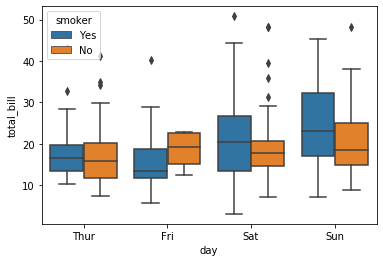

In [32]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')
#plot shows the core tiles of data set while whisker extends to show the rest of the data set and dots are outliers
#hue argument will allow us to split up these box plots even further by another categorical column
#total_bill of non-smoker on friday is higher than the smoker

In [47]:
#violin plot similar to box plot but more detailed

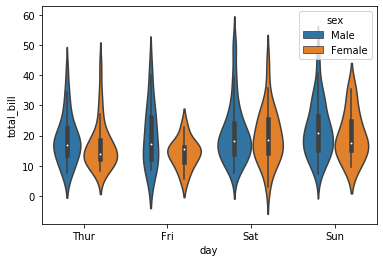

In [43]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')
#it aloows us to plot all the components that correspond to actual data points and essentially showing 
#kernel density estimation of the underlying distribution

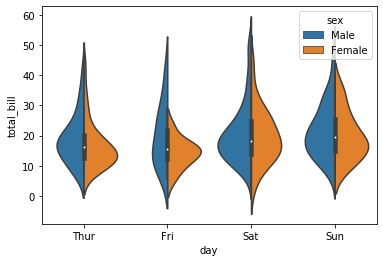

In [46]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

In [50]:
#stripplot: basically a scattered plot on based on the category
#you cant really tell how many points are stacked over each other you can put jitter=True to separate those

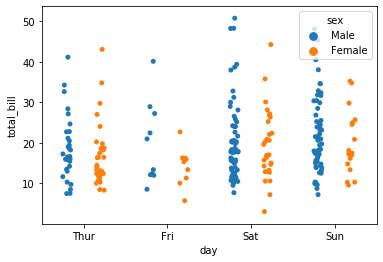

In [57]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)#split actually splitting the category

In [62]:
#swarmplot is a combimnation of strip plot and violin plot
#not to use it for very large data set, sometimes they dont actually scale that 
#well to very large number(point go very wide)

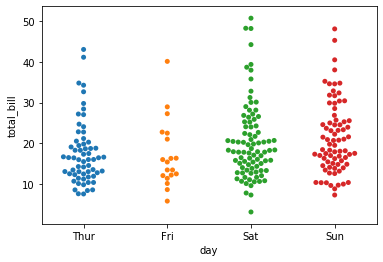

In [59]:
sns.swarmplot(x='day',y='total_bill',data=tips)

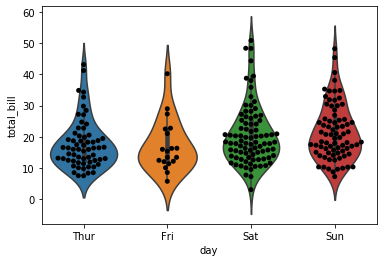

In [67]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')
#dont use this plot for presentaion since it contains too much infomation
#just for exploratory data analysis

In [73]:
#fator plot: allows you to call different plots 

/Users/nikhilraizada/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


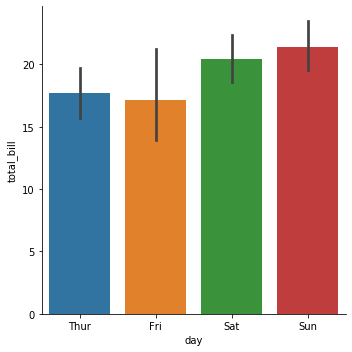

In [71]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [84]:
#matrix plots

In [76]:
import seaborn as sns

In [78]:
%matplotlib inline

In [79]:
tips=sns.load_dataset('tips')
flights= sns.load_dataset('flights')

In [82]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
#Heat map(basic definition): A heatmap is a two-dimensional graphical representation of data where the 
#individual values that are contained in a matrix are represented as colors

In [91]:
#for a heat map to work properly.Your data should already be in a matrix form.by matrix 
#form is so that the index name and the column name match up so that the cell
#in short, any column or data should come in the row index instead of index number

In [93]:
#creating matrix form of data

In [95]:
tc = tips.corr()

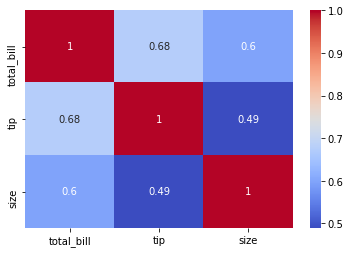

In [97]:
sns.heatmap(tc,annot=True,cmap='coolwarm')
#annot:annotate the actual value which belong to each of the cell
#cmap is for color 

In [102]:
#alternative way of creating a matrix of databy pivot table 

In [108]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

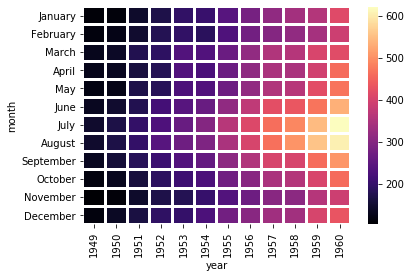

In [122]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=2)
#gradually as years increasing you will see more flights
#cells are touching each other directly, to make them seperate and more understanding 
#you can use linecolor and linewidths argument


In [129]:
#second matrix type plot in seaborn
#clustermap:It basically clusters the information to try to show columns and rows that are similar to each other
#for ex: hierarchy showing 1959 and 1960 ,august and july similar to each other

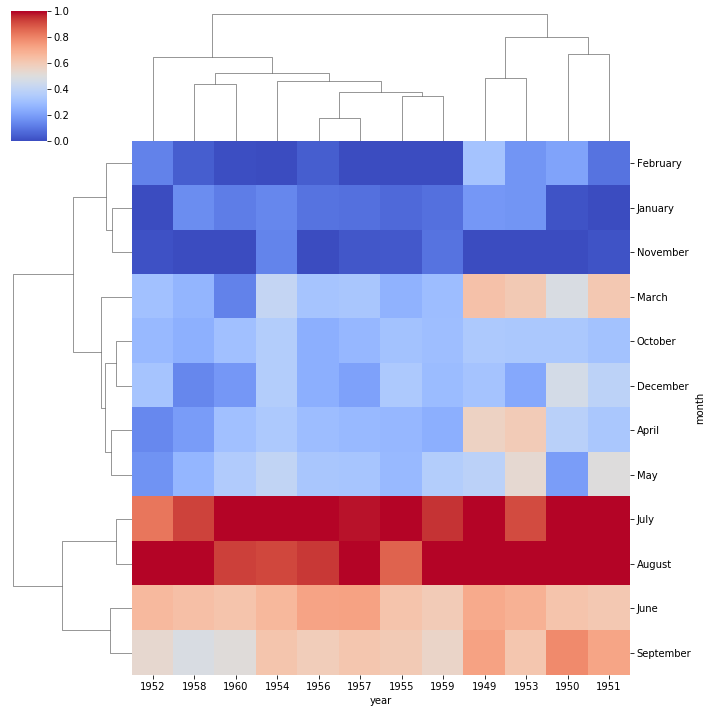

In [134]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [137]:
#Difference between heat map and cluster map
#heat map will display things in the order you put them in whereas a cluster map will cluster
#things in an order so that similar groups are close to each other.

In [138]:
#Grids

In [139]:
import seaborn as sns

In [140]:
%matplotlib inline

In [141]:
iris = sns.load_dataset('iris')

In [142]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [146]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [150]:
#pairplot is the automated joint plot for the entire data set
#remember from the distribution

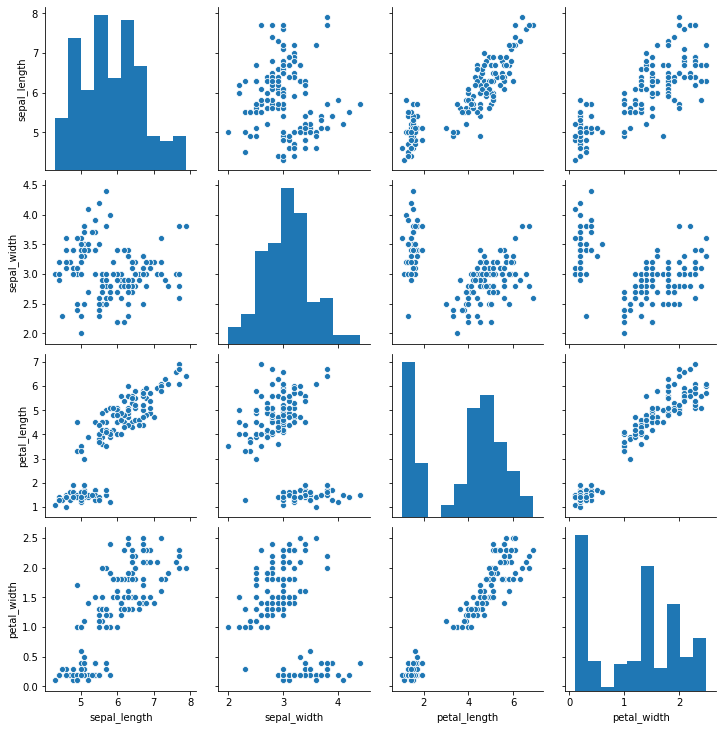

In [149]:
sns.pairplot(iris)

In [151]:
#using pair grid mechanism, we can actually customise the actual plot

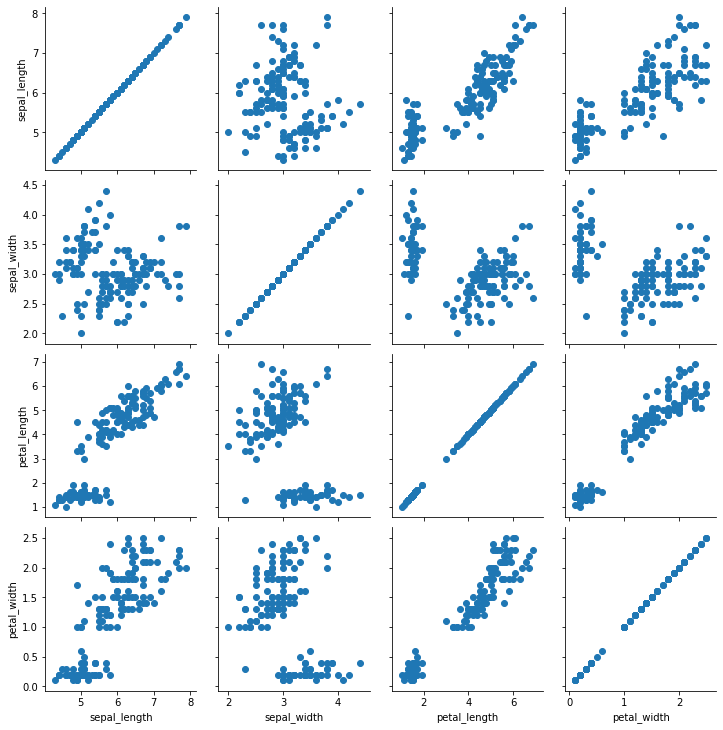

In [153]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

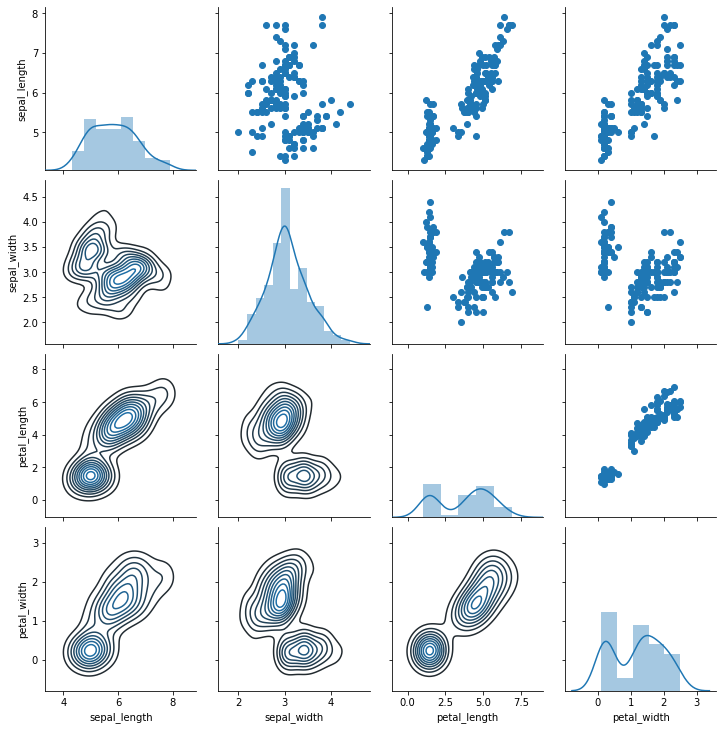

In [155]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


In [156]:
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
#analagous to a histogram. KDE represents the data using a continuous probability density curve in one or 
#more dimensions.
#Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, 
#especially when drawing multiple distributions. But it has the potential to introduce distortions if the 
#underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends 
#on the selection of good smoothing parameters.


In [157]:
tips=sns.load_dataset('tips')

In [158]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


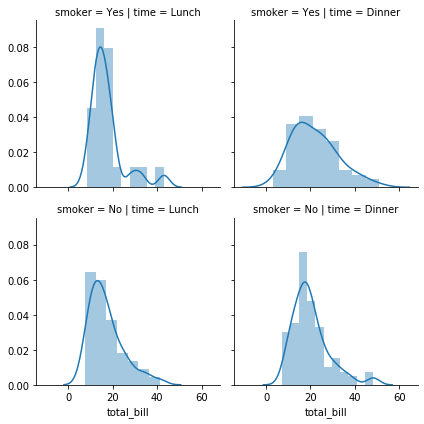

In [163]:
g= sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')#put a column you want to map

#put a column you want to map

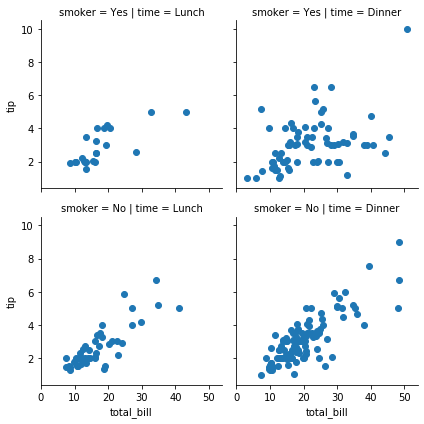

In [167]:
#if plot type need more than 1 argument,just add second argument in map call
g= sns.FacetGrid(tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')#put a column you want to map



In [169]:
#Regression plots

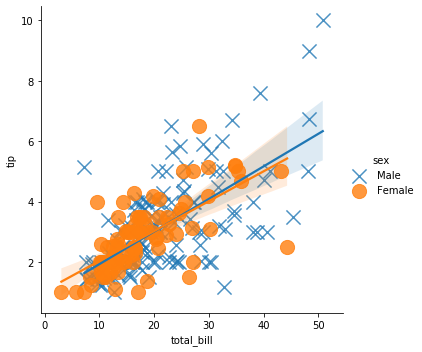

In [180]:
#linear model plt
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['x','o'],scatter_kws={'s':200})
#scatter_kws: it a call to matplotlib, s is for size of markers or scatter plot. In general reference documentaion
#makers will come from the matplotlib marker symbols

/Users/nikhilraizada/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


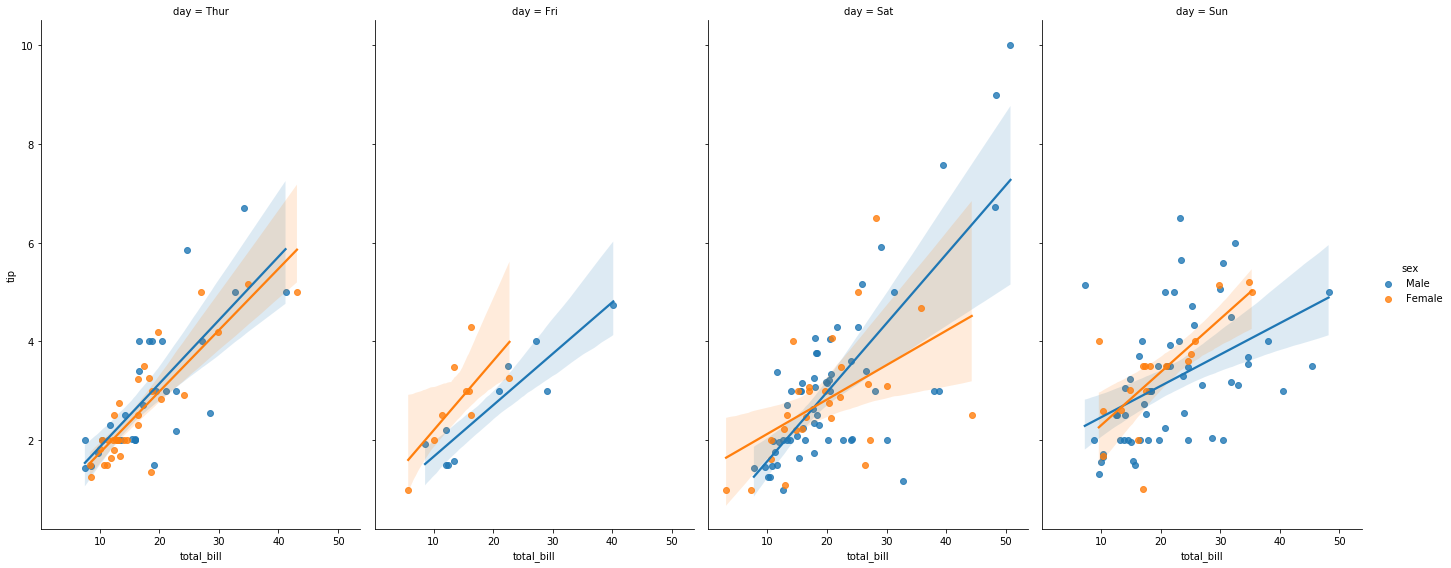

In [193]:
#instead of separating by color using hue argument, we can separate it by row and column argument
#here we are using as well for other categorical column
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,size=8)
#aspect: ratio between height and width

In [194]:
#Style and color

In [195]:
tips=sns.load_dataset('tips')

In [196]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [197]:
#setting particular styles

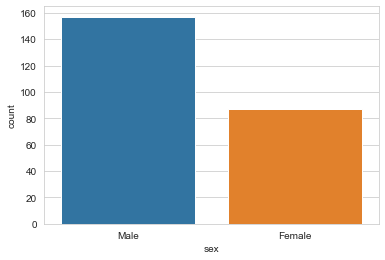

In [200]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)


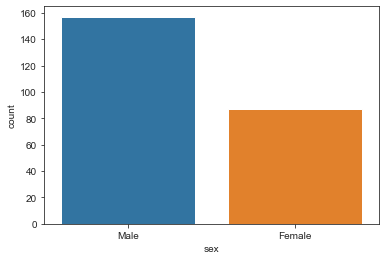

In [204]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
#you can check more styles more documentation


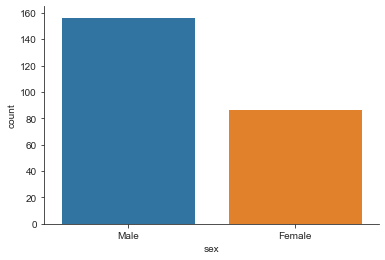

In [205]:
sns.countplot(x='sex',data=tips)
sns.despine()

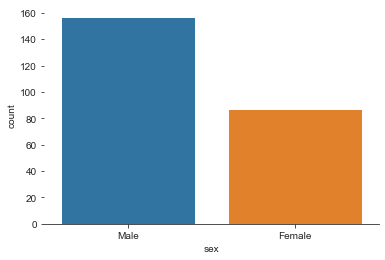

In [206]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

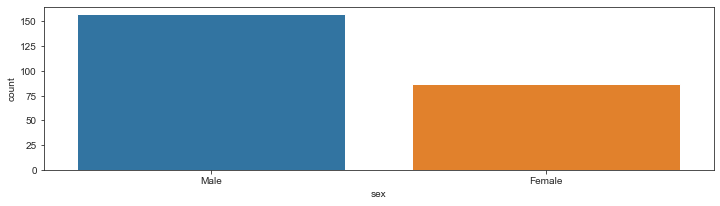

In [208]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

In [226]:
#SEABORN comes a convenient set underscore context which allows you to override default parameters and
#change Font scales depending on what you're actually creating the figure for.

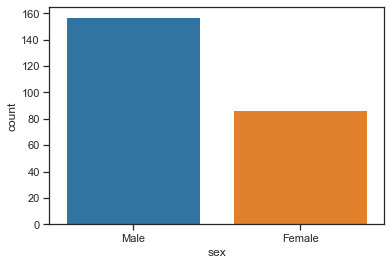

In [227]:
#changing font size
#put context as how you want to create your figure. For ex: notebook,poster 
sns.set_context('notebook',font_scale=1)
sns.countplot(x='sex',data=tips)

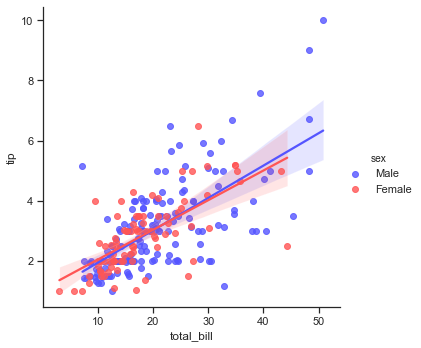

In [225]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')
#palette is matplotlib colormap, check on google for more colormap

In [1]:
#Seaborn exercise